$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [45]:
import numpy as np

def vibrating_string(L, N, c, dt, T, psi):
    # Initialization
    dx = L / N
    psi_new = np.zeros(N+1)  # Wave function at next step
    psi_old = np.zeros(N+1)  # Wave function at previous step
    psi = np.copy(psi)  # Ensure psi is not modified outside

    # Set initial condition is assumed to be done outside this function

    # First time step (could be refined for specific initial velocity conditions)
    for i in range(1, N):
        psi_new[i] = psi[i] + 0.5 * (c * dt / dx) ** 2 * (psi[i+1] + psi[i-1] - 2 * psi[i])
    psi_old, psi = psi, psi_new  # Prepare for next step

    # Time evolution
    time_steps = int(T / dt)
    for _ in range(1, time_steps):
        psi_old, psi = psi, np.copy(psi_new) 
        for i in range(1, N):
            psi_new[i] = 2 * psi[i] - psi_old[i] + (c * dt / dx) ** 2 * (psi[i+1] + psi[i-1] - 2 * psi[i])

        # Apply boundary conditions
        psi_new[0], psi_new[N] = 0, 0  # Fixed ends

    return psi_new



In [53]:
# Simulation parameters
L = 1.0      # Length of the string
N = 100      # Number of intervals (N+1 points)
c = 1.0      # Wave speed
dt = 0.001   # Time step
# T = 90.0      # Total time of simulation

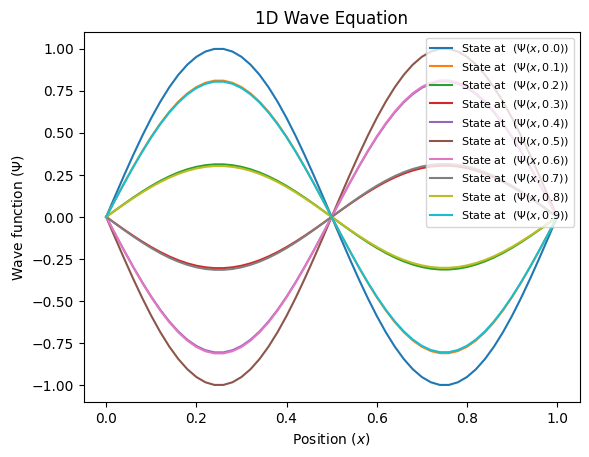

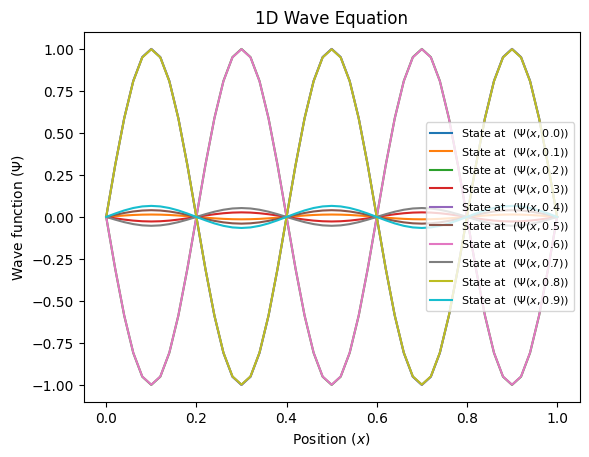

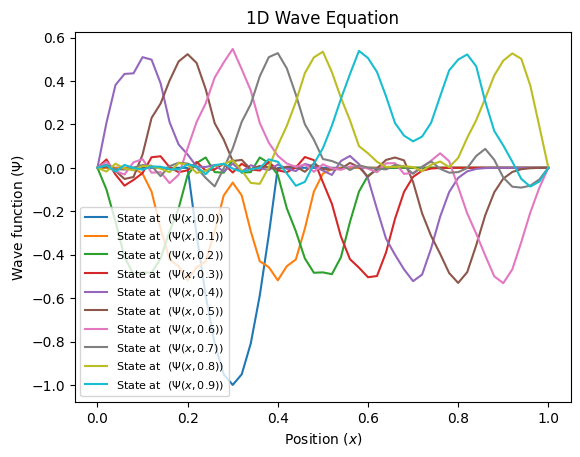

In [63]:
xs = np.linspace(0, L, N+1)  # Position array

def timestepping(xs):
    i = np.sin(2*np.pi*xs)
    ii = np.sin(5*np.pi*xs)
    iii = []
    for x in xs:
        if x > 1/5 and x < 2/5:
            iii.append(np.sin(5*np.pi*x))
        else: 
            iii.append(0)

    psis = [i, ii, iii]
    return psis

psis = timestepping(xs)
for psi in psis:
    for T in np.arange(0, 1, 0.1):
        psi_new = vibrating_string(L, N, c, dt, T, psi)

        # Plot the final state
        plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(T, 2)})$)')
    plt.xlabel('Position ($x$)')
    plt.ylabel('Wave function ($\Psi$)')
    plt.title('1D Wave Equation')
    plt.legend(fontsize = 8)
    plt.show()

In [62]:
# Prepare individual figure for each psi
for idx, psi in enumerate(psis):
    fig, ax = plt.subplots()
    ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
    
    # Initial line for this psi
    line, = ax.plot(xs, psi, label=f'Initial state $\Psi_{idx}(x, 0)$')
    ax.legend(fontsize=8)
    
    # Animation function for this psi
    def animate(T, idx=idx, line=line):  # Capture current 'idx' and 'line' in the closure
        psi_new = vibrating_string(L, N, c, dt, T, psi)
        line.set_ydata(psi_new)
        ax.set_title(f'1D Wave Equation at T={T:.2f} for $\Psi_{idx}(x, 0)$')
    
    # Create animation for this psi
    ani = FuncAnimation(fig, animate, frames=np.arange(0, 30, 1), interval=100)
    ani.save(f'animation_psi_{idx}.gif', writer=PillowWriter(fps=10))

    plt.close(fig)  # Close the figure to prevent it from displaying inline


# 1.2


# D


Top: $c(x, y=1, t) = H(t)$\
Left: $c(x=0, y, t) = c(x=1, y, t)$\
Right: $c(x=1, y, t) =c(x=0, y, t)$\
Bottom: $c(x, y=0, t) = 0$


# E

???


# F

In [16]:
def simulate_diffusion(Nx, Ny, D, dx, dy, dt, Nt):
    # Initialize solution: u(x, y, t=0)
    u = np.zeros((Nx, Ny))
    
    # Initial condition: a peak in the center
    u[Nx//2, Ny//2] = 100.0

    # Time-stepping loop
    for n in range(Nt):
        u_new = u.copy()
        # Update u using the explicit finite difference scheme
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                u_new[i, j] = u[i, j] + (D*dt / dx**2) * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - 4*u[i, j])
                
        u = u_new.copy()
        
        # Apply boundary conditions (for simplicity, assume u=0 at boundaries)
        u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0

    return u

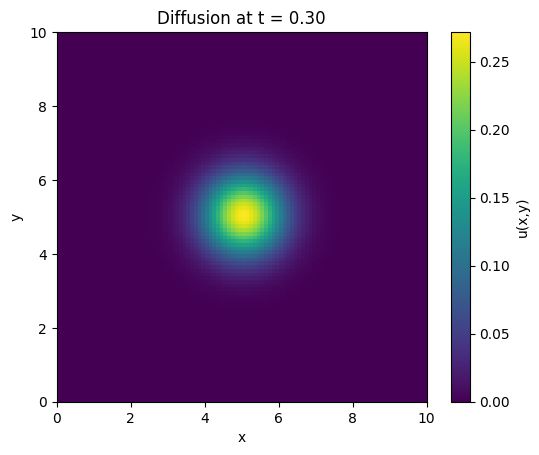

In [17]:
# Domain size and grid resolution
Lx, Ly = 10.0, 10.0  # Domain size in x and y directions
Nx, Ny = 100, 100  # Number of grid points in x and y directions
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  # Grid spacing in x and y directions

# Diffusion coefficient
D = 1.0

# Time stepping parameters
dt = 0.0001  # Time step size
Nt = 1000  # Number of time steps

u = simulate_diffusion(Nx, Ny, D, dt, dy, dt, Nt)

# Plot the final state
plt.imshow(u, extent=(0, Lx, 0, Ly), origin='lower')
plt.colorbar(label='u(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diffusion at t = {:.2f}'.format(Nt*dt))
plt.show()